# List raw and processed dataset files (Internal geoscan dataset only)
Copyright (C) 2021 ServiceNow, Inc.

This notebook examines which pdf files exist, along with which processed .csv files from the pdf->csv conversion. 
It saves the mapping between pdfs and processed csvs to a parquet file `/nrcan_p2/data/02_intermediate/20210119/merged_filelist.parquet` for use in other dataset analysis.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from pathlib import Path

### Define all the paths to the raw dataset files

In [4]:
pdf_source = '/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf'
zip_sources = '/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted'
zip_folders = ['generic_pdfs', 'has_pdf_dir', 'low_text_pdfs',  'of_pdf',  'txt',  'wp_rtf']

filepath = '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/'

### Collect all raw filenames into a single df

In [5]:
def collect_files_and_ext_into_df(filepath, double_stem=False):
    file_types = []
    file_names = []
    file_groups = []
    stems = []
    for file in Path(filepath).iterdir(): 
        if file.name.startswith('.'):
            continue
        file_types.append(file.suffix)
        file_names.append(str(file.name))
        if double_stem:
            file_groups.append(str(Path(file.stem).stem.split('_')[0]))
            stems.append(str(Path(file.stem).stem))
        else:
            file_groups.append(str(file.stem.split('_')[0]))
            stems.append(str(file.stem))

    df = pd.DataFrame({'ext': file_types, 'name': file_names, 'group': file_groups, 'stem': stems})
    df['source'] = str(filepath)
    
    return df

pdf_df = collect_files_and_ext_into_df(pdf_source)

In [6]:
zip_dfs = []
for folder in zip_folders:
    filepath = Path(zip_sources) / folder
    zip_df = collect_files_and_ext_into_df(filepath)
    zip_dfs.append(zip_df)

zip_dfs = pd.concat(zip_dfs)

In [7]:
raw_files = pd.concat([pdf_df, zip_dfs])
raw_files

,ext,name,group,stem,source
0,.pdf,100327.pdf,100327,100327,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
1,.pdf,100328.pdf,100328,100328,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
2,.pdf,100331.pdf,100331,100331,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
3,.pdf,100335.pdf,100335,100335,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
4,.pdf,100337.pdf,100337,100337,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
...,...,...,...,...,...
59,.rtf,292280_Readme.rtf,292280,292280_Readme,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
60,.rtf,292280_licence_agreement_e.rtf,292280,292280_licence_agreement_e,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
61,.rtf,293925_licence_agreement_e.rtf,293925,293925_licence_agreement_e,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
62,.rtf,293925_readme_e.rtf,293925,293925_readme_e,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


### Define and collect all processed files

In [8]:
pdf_processed_source = '/nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all'
txt_processed_source = '/nrcan_p2/data/02_intermediate/20201117/geoscan/txt'
rtf_processed_source = '/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf'

zip_processed_source = '/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf'
zip_processed_folders = ['generic_pdfs_all', 'has_pdf_dir_all', 'of_pdf_all', 'low_text_pdfs']

pdf_df = collect_files_and_ext_into_df(pdf_processed_source, double_stem=True)
txt_df = collect_files_and_ext_into_df(txt_processed_source, double_stem=True)
rtf_df = collect_files_and_ext_into_df(rtf_processed_source, double_stem=True)

zip_dfs = []
for folder in zip_processed_folders:
    filepath = Path(zip_processed_source) / folder
    zip_df = collect_files_and_ext_into_df(filepath, double_stem= True)
    zip_dfs.append(zip_df)

zip_dfs = pd.concat(zip_dfs)

In [9]:
processed_files = pd.concat([pdf_df, txt_df, rtf_df, zip_dfs])
processed_files

,ext,name,group,stem,source
0,.csv,100327.pdfminer_split.csv,100327,100327,/nrcan_p2/data/02_intermediate/20201006/geosca...
1,.csv,100328.pdfminer_split.csv,100328,100328,/nrcan_p2/data/02_intermediate/20201006/geosca...
2,.csv,100331.pdfminer_split.csv,100331,100331,/nrcan_p2/data/02_intermediate/20201006/geosca...
3,.csv,100335.pdfminer_split.csv,100335,100335,/nrcan_p2/data/02_intermediate/20201006/geosca...
4,.csv,100337.pdfminer_split.csv,100337,100337,/nrcan_p2/data/02_intermediate/20201006/geosca...
...,...,...,...,...,...
6423,.csv,129459_gscof_352_e_1976_mn05.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn05,/nrcan_p2/data/02_intermediate/20201117/geosca...
6424,.csv,129459_gscof_352_e_1976_mn06.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn06,/nrcan_p2/data/02_intermediate/20201117/geosca...
6425,.csv,129459_gscof_352_e_1976_mn07.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn07,/nrcan_p2/data/02_intermediate/20201117/geosca...
6426,.csv,129459_gscof_352_e_1976_mn08.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn08,/nrcan_p2/data/02_intermediate/20201117/geosca...


### Merge the processed and raw filename dfs into a single df

In [10]:
merged_files = pd.merge(processed_files, raw_files, on='stem', how='left', suffixes=('_processed', '_raw'))
merged_files = merged_files[~merged_files.name_processed.str.contains('pdfminer_failed_pages')]
merged_files

,ext_processed,name_processed,group_processed,stem,source_processed,ext_raw,name_raw,group_raw,source_raw
0,.csv,100327.pdfminer_split.csv,100327,100327,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100327.pdf,100327,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
1,.csv,100328.pdfminer_split.csv,100328,100328,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100328.pdf,100328,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
2,.csv,100331.pdfminer_split.csv,100331,100331,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100331.pdf,100331,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
3,.csv,100335.pdfminer_split.csv,100335,100335,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100335.pdf,100335,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
4,.csv,100337.pdfminer_split.csv,100337,100337,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100337.pdf,100337,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
...,...,...,...,...,...,...,...,...,...
20329,.csv,129459_gscof_352_e_1976_mn05.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn05,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn05.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20330,.csv,129459_gscof_352_e_1976_mn06.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn06,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn06.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20331,.csv,129459_gscof_352_e_1976_mn07.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn07,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn07.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20332,.csv,129459_gscof_352_e_1976_mn08.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn08,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn08.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


In [11]:
merged_files = merged_files[~merged_files.group_raw.isnull()]
merged_files

,ext_processed,name_processed,group_processed,stem,source_processed,ext_raw,name_raw,group_raw,source_raw
0,.csv,100327.pdfminer_split.csv,100327,100327,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100327.pdf,100327,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
1,.csv,100328.pdfminer_split.csv,100328,100328,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100328.pdf,100328,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
2,.csv,100331.pdfminer_split.csv,100331,100331,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100331.pdf,100331,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
3,.csv,100335.pdfminer_split.csv,100335,100335,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100335.pdf,100335,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
4,.csv,100337.pdfminer_split.csv,100337,100337,/nrcan_p2/data/02_intermediate/20201006/geosca...,.pdf,100337.pdf,100337,/nrcan_p2/data/01_raw/20201006/geoscan/raw/pdf
...,...,...,...,...,...,...,...,...,...
20329,.csv,129459_gscof_352_e_1976_mn05.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn05,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn05.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20330,.csv,129459_gscof_352_e_1976_mn06.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn06,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn06.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20331,.csv,129459_gscof_352_e_1976_mn07.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn07,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn07.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...
20332,.csv,129459_gscof_352_e_1976_mn08.pdfminer_split.csv,129459,129459_gscof_352_e_1976_mn08,/nrcan_p2/data/02_intermediate/20201117/geosca...,.pdf,129459_gscof_352_e_1976_mn08.pdf,129459,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...


### Which raw files don't have a processed file?

See below - the missing files are all failed page files or other non-data files

In [12]:
processed_files[~processed_files.name.isin(merged_files.name_processed)]

,ext,name,group,stem,source
5278,,replaced,replaced,replaced,/nrcan_p2/data/02_intermediate/20201117/geosca...
0,.lock,timeout_files.txt.lock,timeout,timeout_files,/nrcan_p2/data/02_intermediate/20201117/geosca...
1,.txt,timeout_files.txt,timeout,timeout_files,/nrcan_p2/data/02_intermediate/20201117/geosca...
186,.csv,100411_of_0255_Tables_Figures.pdfminer_failed_...,100411,100411_of_0255_Tables_Figures,/nrcan_p2/data/02_intermediate/20201117/geosca...
363,.csv,100460_of_0385_appendix_a.pdfminer_failed_page...,100460,100460_of_0385_appendix_a,/nrcan_p2/data/02_intermediate/20201117/geosca...
365,.csv,100460_of_0385_appendix_b_part1.pdfminer_faile...,100460,100460_of_0385_appendix_b_part1,/nrcan_p2/data/02_intermediate/20201117/geosca...
367,.csv,100460_of_0385_appendix_b_part2.pdfminer_faile...,100460,100460_of_0385_appendix_b_part2,/nrcan_p2/data/02_intermediate/20201117/geosca...
2475,.csv,102273_pa_72-08_Figure_02_Part_A.pdfminer_fail...,102273,102273_pa_72-08_Figure_02_Part_A,/nrcan_p2/data/02_intermediate/20201117/geosca...
3014,.csv,103346_pa_68-5_fig_1.pdfminer_failed_pages.csv,103346,103346_pa_68-5_fig_1,/nrcan_p2/data/02_intermediate/20201117/geosca...
3106,.csv,103608_me_386_fig.5.pdfminer_failed_pages.csv,103608,103608_me_386_fig.5,/nrcan_p2/data/02_intermediate/20201117/geosca...


### Which processed files don't have a raw file? (it should be none)

In [13]:
merged_files[~merged_files.name_processed.isin(processed_files.name)]

,ext_processed,name_processed,group_processed,stem,source_processed,ext_raw,name_raw,group_raw,source_raw


## What kind of files exist in the raw and processed folders

<ipython-input-14-41e6866c9797>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_files['ext_raw'] = merged_files.ext_raw.str.lower()


Text(0.5, 1.0, 'Distribution of file types in raw files')

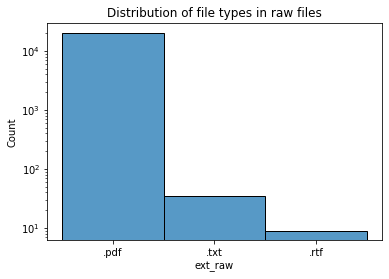

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
merged_files['ext_raw'] = merged_files.ext_raw.str.lower()
sns.histplot(data=merged_files, x='ext_raw', log_scale=(False, True))
plt.title('Distribution of file types in raw files')

<ipython-input-15-9ae4acd64c05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_files['ext_processed'] = merged_files.ext_processed.str.lower()


Text(0.5, 1.0, 'Distribution of file types in processed files')

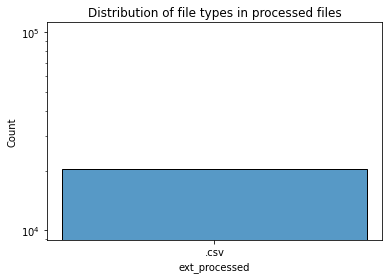

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
merged_files['ext_processed'] = merged_files.ext_processed.str.lower()
sns.histplot(data=merged_files, x='ext_processed', log_scale=(False, True))
plt.title('Distribution of file types in processed files')

## Data Sources

In [16]:
merged_files.source_processed.value_counts()

/nrcan_p2/data/02_intermediate/20201006/geoscan/pdf/v1_all              7008
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/low_text_pdfs       6400
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/generic_pdfs_all    5283
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/of_pdf_all          1159
/nrcan_p2/data/02_intermediate/20201117/geoscan/pdf/has_pdf_dir_all      411
/nrcan_p2/data/02_intermediate/20201117/geoscan/txt                       35
/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf                     9
Name: source_processed, dtype: int64

## Save to a file

In [ ]:
#merged_files.to_parquet('/nrcan_p2/data/02_intermediate/20210106/merged_filelist.parquet')

In [19]:
merged_files.to_parquet('/nrcan_p2/data/02_intermediate/20210119/merged_filelist.parquet')